 ch6. 1~5 pg. 377~407

## Chapter 6 차원 축소

## 01 차원 축소 (Dimension Reduction) 개요

- 차원 축소: 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것

- 일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고, 희소(sparse)한 구조를 갖게 됨. 수백 개 이상의 피처로 구성된 데이터 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어짐. 피처가 많을 경우 개별 피처 간에 상관관계가 높을 가능성이 큼.

-> 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있음. 학습 데이터의 크기도 줄어들어 학습에 필요한 처리 능력도 줄일 수 있음.

- 피처 선택(feature selection): 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것. 

- 피처 추출(feature extraction): 기존 피처를 저차원의 중요 피처로 압축(피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것)해서 추출하는 것. 새롭게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값임.

- 매우 많은 차원을 가지고 있는 이미지나 텍스트에서 차원 축소를 통해 잠재적인 의미를 찾아주는데 사용. 

## 02 PCA (Principal Component Analysis)

### PCA 개요

- PCA는 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법

- 차원 축소 시, 기존 데이터의 정보 유실이 최소화되도록 PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소함. 데이터 변동성이 가장 큰 방향으로 축을 생성하고, 새롭게 생성된 축으로 데이터를 투영하는 방식

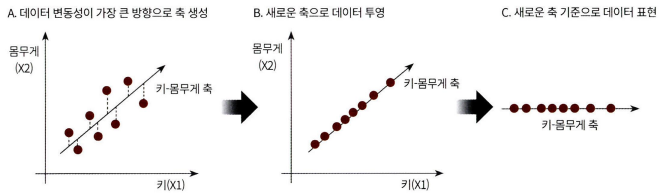

PCA는 가장 큰 데이터 변동성(Variance)를 기준으로 첫 번째 벡터 축을 생성하고, 두 번째 축은 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 함. 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성함. 이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소됨. 

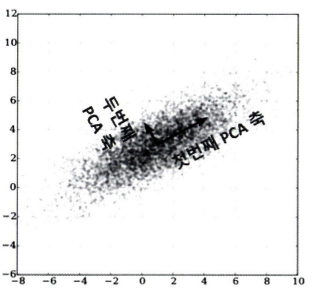

선형대수 관점에서, 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것. 고윳값(eigenvalue)은 고유벡터의 크기를 나타내며, 입력 데이터의 분산을 나타냄. 

- 선형 변환: 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것

- 공분산: 두 변수 간의 변동 (COV(X,Y))

- 고유벡터: 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터. 고유벡터는 여러 개가 존재하며, 정방 해렬은 최대 그 차원 수만큼의 고유 벡터를 가질 수 있음. 
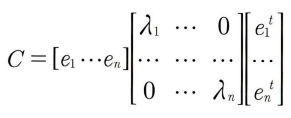



PCA: 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식

1. 입력 데이터 세트의 공분산 행렬을 생성

2. 공분산 행렬의 고유벡터와 고유값을 계산

3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터를 추출

4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


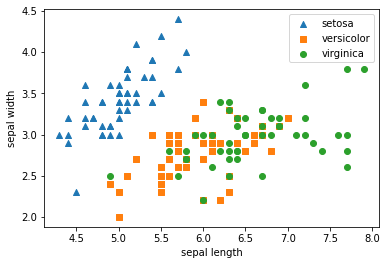

In [ ]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^','s','o']

# setosa의 target값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers):
  x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

# versicolor과 virginica는 sepal width와 sepal length 조건만으로는 분류가 어려움.

(150, 2)
   pca_component_1  pca_component_2  target
0        -2.264703         0.480027       0
1        -2.080961        -0.674134       0
2        -2.364229        -0.341908       0


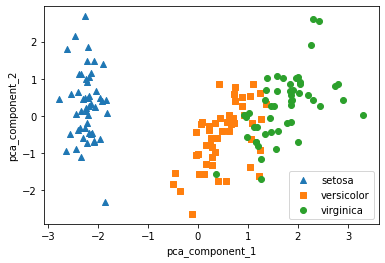

In [ ]:
# PCA로 4개 속성을 2개로 압축한뒤 시각화

from sklearn.preprocessing import StandardScaler
# target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled=StandardScaler().fit_transform(irisDF.iloc[:,:-1])

from sklearn.decomposition import PCA
pca=PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

# PCA 변환된 데이터 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
print(irisDF_pca.head(3))

# 2개의 속성으로 PCA 변환된 데이터 세트를 2차원 상에서 시각화
# setosa를 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^','s','o']

# pca_component_1을 x축, pca_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
  x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [ ]:
# PCA Component 별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 알아보기
# PCA 객체의 explained_variance_ratio_속성은 전체 변동성에서 개별 PCA component 별로 차지하는 변동성 비율을 제공
print(pca.explained_variance_ratio_)

# pca_component_1이 전체 변동성의 약 72.9%를 차지하며, pca_component_2가 약 22.8%를 차지함. 
# PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있음.

[0.72962445 0.22850762]


In [ ]:
# 원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용한 뒤 cross_val_score()로 3개의 교차 검증 세트로 정확도 결과 비교

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

# PCA 변환한 2차원 데이터 세트에 랜덤 포레스트 적용
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:',np.mean(scores_pca))

# 원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 갯에 따라 예측 성능이 떨어질 수밖에 없음.

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96
PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# header로 의미 없는 항 제거, iloc로 기존 id 제거
import pandas as pd
import xlrd
df = pd.read_excel('/content/drive/MyDrive/Data/credit_card.xls', header=1, sheet_name='Data').iloc[:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


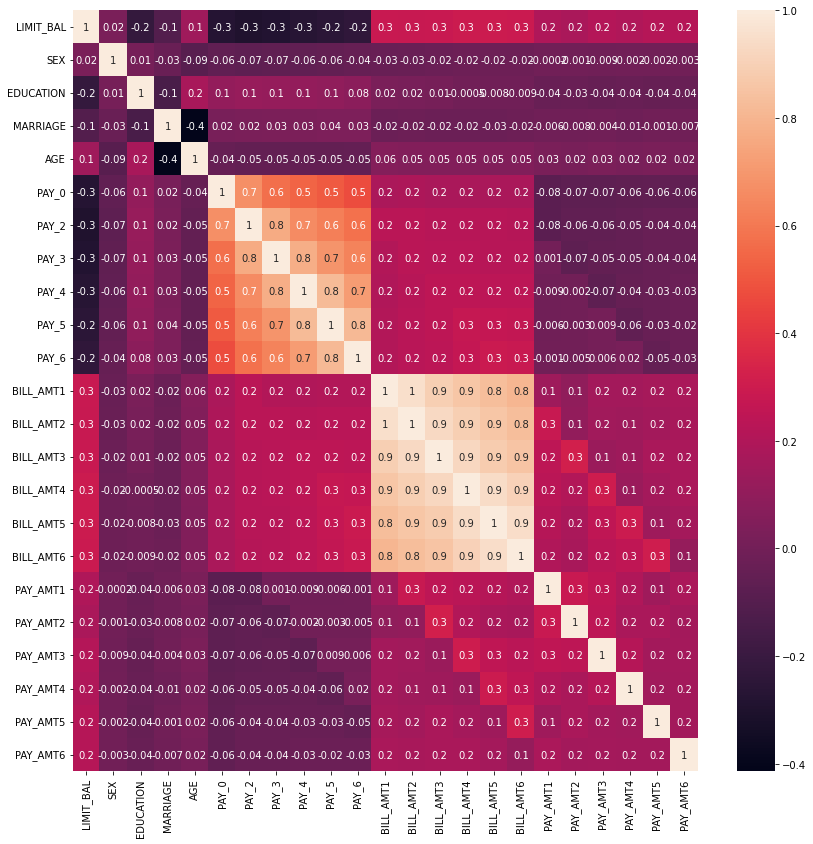

In [ ]:
# default payment next month 속성이 target 값으로, 다음달 연체 여부를 의미. 연체이면 1, 정상납부면 0
# PAY_2 열을 PAY_1, 'default payment next month'열도 'default'로 칼럼명 변경
df.rename(columns={'PAY0':'PAY1','default payment next month':'default'},inplace=True)
y_target = df['default']
X_features = df.drop('default',axis=1)

# 23개 속성에 대한 상관도 시각화하기
import seaborn as sns
import matplotlib.pyplot as plt

corr=X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g') # annot: 각 cell의 값 표기 유무

# 변수들간의 상관도가 매우 높음. 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1~BILL_AMT6까지 6개의 속성명 생성
cols_bill=['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체를 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca=PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:',pca.explained_variance_ratio_)
# 2개의 PCA component만으로 6개 속성의 변동성을 약 95% 이상 설명 가능. 
# 첫 번쨰 PCA 축으로 90%의 변동성을 수용할 정도로 6개 속성의 상관도가 매우 높음.

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


In [ ]:
# 원본 데이터 세트와 6개의 component로 PCA 변환한 데이터 세트의 분류 예측 결과 비교

# 원본 데이터 세트
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf=RandomForestClassifier(n_estimators=300, random_state=156)
scores=cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 개별 Fold 세트별 정확도:',scores)
print("평균 정확도:{0:.4f}".format(np.mean(scores))) 

CV=3인 경우의 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [ ]:
# PCA로 변환한 데이터 세트
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardScaler 적용
scaler=StandardScaler()
df_scaled=scaler.fit_transform(X_features)

# 6개의 component를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행
pca=PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf,df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:',scores_pca)
print("PCA 변환 데이터 세트 평균 정확도:{0:.4f}".format(np.mean(scores_pca))) 

# 전체 속성의 1/4 정도만으로 원본 데이터 세트 수치의 예측 성능을 유지할 수 있을 만큼 PCA의 압축 능력이 뛰어남.

CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7924 0.7967 0.8025]
PCA 변환 데이터 세트 평균 정확도:0.7972


PCA는 차원 축소를 통해 데이터를 쉽게 인지하는데 활용할 수 있지만, 컴퓨터 비전 분야에서 더 활발하게 적용됨. 특히, 얼굴 인식의 경우 Eigen-face라고 불리는 PCA 변환으로 원본 얼굴 이미지를 변환해 사용하는 경우가 많음.

## 03 LDA (Linear Discriminant Analysis)

### LDA 개요

- 선형 판별 분석법

- PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소함. PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음.

- 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원을 축소함. 즉, 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식

- LDA를 구하는 Step 

1. 클래스 내부 분산과 클래스 간 분산 행렬을 생성. 이 2개의 행렬은 입력 데이터의 결정 값 클래스 별로 개별 피처의 평균 벡터(mean vector)를 기반으로 구함.

2. 클래스 내부 분산 행렬을 Sw, 클래스 간 분산 행렬을 Sb라고 하면, 다음 식으로 두 행렬을 고유 벡터로 분해 가능.

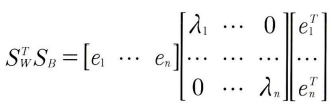

3. 고유값이 가장 큰 순으로 K개(LDA 변환 차수만큼) 추출

4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환함.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled=StandardScaler().fit_transform(iris.data)

# 2개의 component로 붓꽃 데이터를 LDA 변환
# LDA는 PCA와 달리 지도학습이므로 클래스의 결정 값이 변환 시에 필요함.
lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


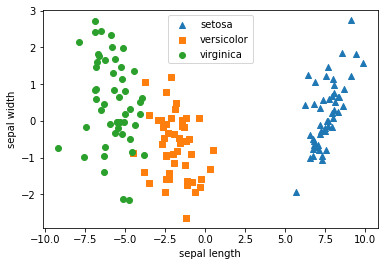

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

lda_columns = ['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target']=iris.target

# setosa를 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^','s','o']

# setosa의 target값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers):
  x_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

## 04 SVD (Singular Value Decomposition)

### SVD 개요

- PCA의 경우 정방행렬(행과 열의 크기가 같은 행렬)만을 고유벡터로 분해할 수 있지만, SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용 가능

- SVD는 m*n 크기의 행렬A를 다음과 같이 분해하는 것 (특이값 분해)

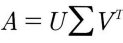

- 행렬 U와 V에 속한 벡터는 특이벡터(singular vector)이며, 모든 특이 벡터는 서로 직교하는 성질을 가짐. 

- SVD는 A의 차원이 m*n일 때, U의 차원이 m*m, ∑(대각행렬)의 차원이 m*n, T(V)의 차원이 n*n으로 분해함.

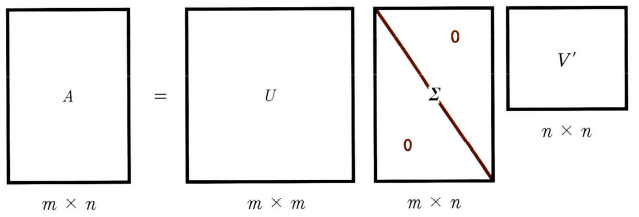

- 일반적으로는 ∑의 비대각인 부분과 대각원소 중에 특이값이 0인 부분도 모두 제거하고 제거된 ∑에 대응되는 U와 V의 원소도 함께 제거해 차원을 줄인 형태로 SVD를 적용

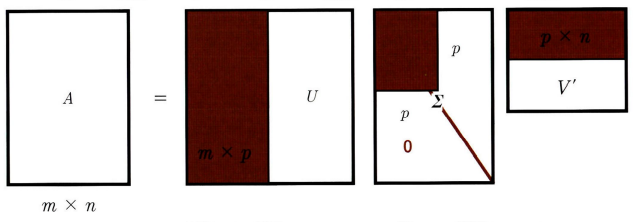

- Truncated SVD는 ∑의 대각원소 중에 상위 몇 개만 추출하여 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것. 



- numpy는 Truncated SVD를 지원하지 않고, 사이파이는 SVD, Truncated SVD 모두 지원

- 사이파이의 SVD는 scipy.linalg.svd를 이용하면 되지만, Truncated SVD는 희소행렬로만 지원되어 행렬의 scipy.spare.linalg.svds를 이용

In [30]:
import numpy as np
from numpy.linalg import svd
# 4*4 램덤 행렬 a 생성 (행렬의 개별 row끼리의 의존성을 없애기 위해)
np.random.seed(121)
a=np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [31]:
# a 행렬에 SVD를 적용하여 U, ∑, Vt 도출
# ∑행렬의 경우 행렬의 대각에 위치한 값만 0이 아니므로 대각원소만 1차원 행렬로 표현
U, Sigma, Vt = svd(a)
print('U matrix:\n',np.round(U,3))
print('Sigma Value:\n',np.round(Sigma,3))
print('V transpose matrix: \n',np.round(Vt,3))

U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix: 
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [32]:
# 분해된 U, ∑, Vt를 이용해 다시 원본 행렬로 복원 (내적 이용)
# ∑를 다시 0을 포함한 대칭행렬로 반환
Sigma_mat=np.diag(Sigma)
a_=np.dot(np.dot(U,Sigma_mat),Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [36]:
# 데이터 세트가 row 간 의존성이 있을 경우
a[2]=a[0]+a[1]
a[3]=a[0]
print(np.round(a,3))

# 다시 SVD를 수행해 Sima값 확인
U, Sigam, Vt=svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Vlaue:\n',np.round(Sigma,3))
# 이전과 차원이 동일하지만, Sigma값 중 2개가 0으로 변함. 
# 선형 독립인 row 벡터의 개수가 2개라는 의미(rank(a)=2)

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]
(4, 4) (4,) (4, 4)
Sigma Vlaue:
 [3.423 2.023 0.463 0.079]


In [38]:
# 분해된 U,∑,Vt를 ∑의 0에 대응되는 U,∑,Vt의 데이터를 제외하고 복원
# U 행렬의 경우는 ∑와 내적을 수행하므로 ∑의 앞 2행에 대응되는 앞 2열만 추출
U_=U[:,:2]
Sigma_=np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_=Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, ∑, Vt의 내적을 수행하며 다시 원본 행렬로 복원
a=np.dot(np.dot(U_,Sigma_),Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [40]:
# Truncated SVD(∑행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식)를 이용해 행렬 분해
# 인위적으로 더 작은 차원의 U,∑,Vt로 분해하기 때문에 원본 행렬을 정확하게 다시 복원할 수 없지만, 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬을 근사 가능
# 원래 차원의 차수에 가깝게 잘라낼수록(Truncate) 원본 행렬에 더 가깝게 복원 가능
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U,∑,Vt 차원 확인
np.random.seed(121)
matrix=np.random.random((6,6))
print('원본 행렬:\n',matrix)

U,Sigma,Vt=svd(matrix,full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape,Vt.shape)
print('\nSigma값 행렬:',Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components=4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k = num_components)
print('\nTruncated SVD 분해 행렬 차원 : ',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬 : ', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬 :\n', matrix_tr)

# Truncated SVD로 분해된 행렬을 다시 복원할 경우 근사적으로 복원됨.

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원 :  (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬 :  [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬 :
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.7267

### 사이킷런 TruncatedSVD 클래스를 이용한 변환

- 사이킷런의 TruncatedSVD 클래스는 사이파이의 svds와 같이 Truncated SVD 연산을 수행해 원본 행렬을 분해한 U,∑,Vt 행렬을 반환하지 않음. 

- 사이킷런의 TruncatedSVD 클래스는 PCA와 유사하게 fit()과 transform()을 호출해 원본 데이터를 몇 개의 주요 component(TruncatedSVD의 K component수)로 차원을 축소해 변환. 



Text(0, 0.5, 'TruncatedSVD Component 2')

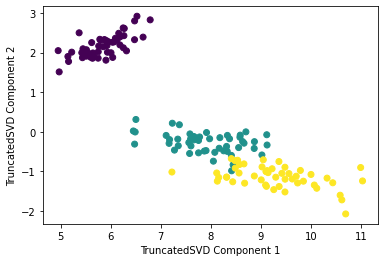

In [42]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data

# 2개의 주요 component로 TruncatedSVD 변환
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd=tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

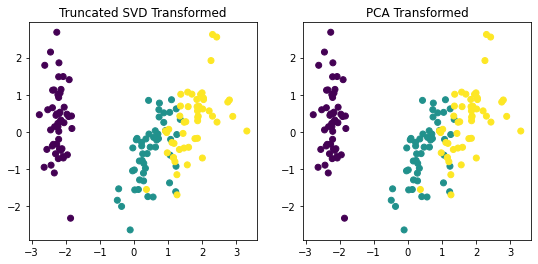

In [43]:
from sklearn.preprocessing import StandardScaler
# 붓꽃 데이터를 StandardScaler로 변환
scaler=StandardScaler()
iris_scaled=scaler.fit_transform(iris_ftrs)

# 스케일된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd=tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca=PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize = (9,4), ncols = 2)
ax1.scatter(x = iris_tsvd[:,0], y = iris_tsvd[:,1], c = iris.target)
ax2.scatter(x = iris_pca[:,0], y = iris_pca[:,1], c = iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [44]:
# 2개의 변환 행렬 값과 원본 속성별 component 비율값 비교
print(((iris_pca-iris_tsvd).mean()))
print((pca.components_-tsvd.components_).mean())

# 2개의 변환이 거의 동일함. 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 SVD와 PCA는 동일한 변환 수행
# PCA가 SVD 알고리즘으로 구현됨. BUT PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하고, SVD는 희소 행렬(Sparse Matrix)에 대한 변환도 가능

2.3538231549065834e-15
7.632783294297951e-17


## 05 NMF (Non-Negative Matrix Factorization)

### NTF 개요

- NTF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 방식의 변형

- 원본 행렬 내의 모든 원소 값이 모두 양수라는게 보장되면 간단하게 2개의 기반 양수 행렬로 분해될 수 있는 기법

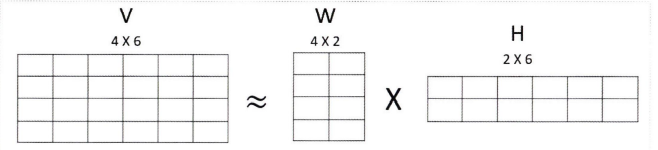

- 행렬 분해를 하게 되면 W행렬과 H행렬은 길고 가는 행렬W와 작고 넓은 행렬H로 분해됨.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


Text(0, 0.5, 'NMF Component 2')

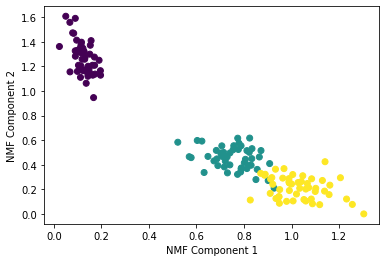

In [46]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data

nmf = NMF(n_components = 2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x = iris_nmf[:,0], y = iris_nmf[:,1], c = iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')